## Objective
Plot RT-Sort's detected sequences

In [ ]:
%load_ext autoreload

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from spikeinterface.extractors import MaxwellRecordingExtractor

%autoreload 2
from braindance.core.spikesorter.manuscript_code import si_rec13 as F
from braindance.core.spikesorter.rt_sort import RTSort

/home/mea/anaconda3/envs/brain_dance/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mea/anaconda3/envs/brain_dance/lib/python3.11/site-packages/torch_tensorrt/fx/tracer/acc_tracer/acc_ops.py:895: UserWarning: Unable to import torchvision related libraries.: operator torchvision::nms does not exist. Please install torchvision lib in order to lower stochastic_depth
  warnings.warn(


In [4]:
RECORDING_PATH = Path("/data/MEAprojects/primary_mouse/e_stim/240210/22441/stim/diff_pattern_stim.raw.h5")

INTER_PATH = Path("/data/MEAprojects/primary_mouse/e_stim/240210/22441/stim/diff_pattern_stim_rt_sort_fix")
##
F.STRINGENT_THRESH = 0.275
F.LOOSE_THRESH = 0.1
F.MEA = True

F.RECORDING = MaxwellRecordingExtractor(RECORDING_PATH)
F.ELEC_LOCS = F.RECORDING.get_channel_locations()
F.NUM_ELECS = F.RECORDING.get_num_channels()
F.SAMP_FREQ = round(F.RECORDING.get_sampling_frequency() / 1000)

F.TRACES = np.load(INTER_PATH / "model_traces.npy", mmap_mode="r")
F.OUTPUTS = np.load(INTER_PATH / "model_outputs.npy", mmap_mode="r")

F.FRONT_BUFFER = round(2*F.SAMP_FREQ)
F.PRE_MEDIAN_FRAMES = round(50*F.SAMP_FREQ)

rt_sort = RTSort.load_from_file(INTER_PATH / "rt_sort.pickle")
all_units = rt_sort.get_units()
for unit in all_units:
    unit.root_elec = unit.chan

Extracting detection probabilities: 100%|██████████| 161/161 [00:00<00:00, 1094.95it/s]


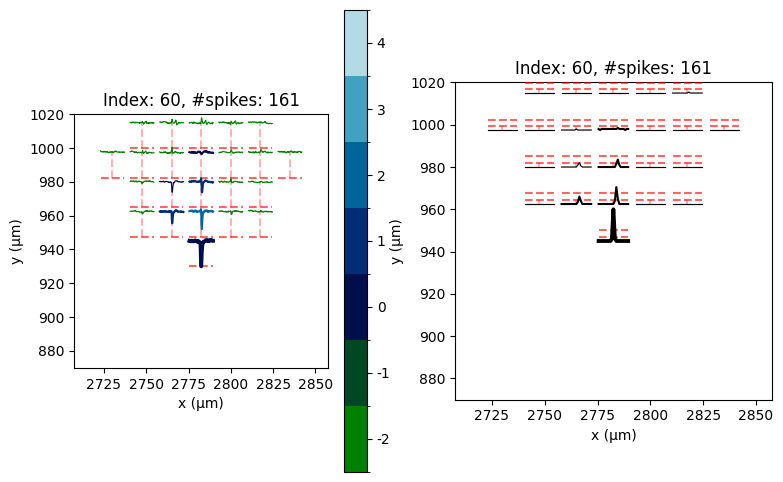

Extracting detection probabilities: 100%|██████████| 20/20 [00:00<00:00, 1445.36it/s]


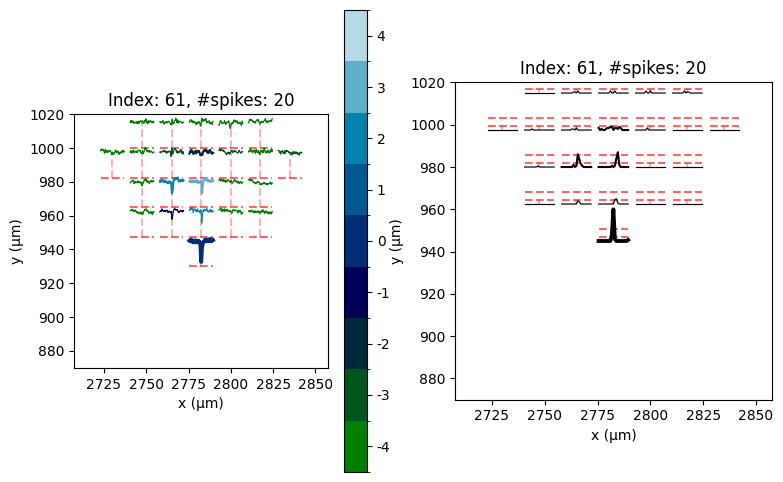

Extracting detection probabilities: 100%|██████████| 300/300 [00:00<00:00, 1281.20it/s]


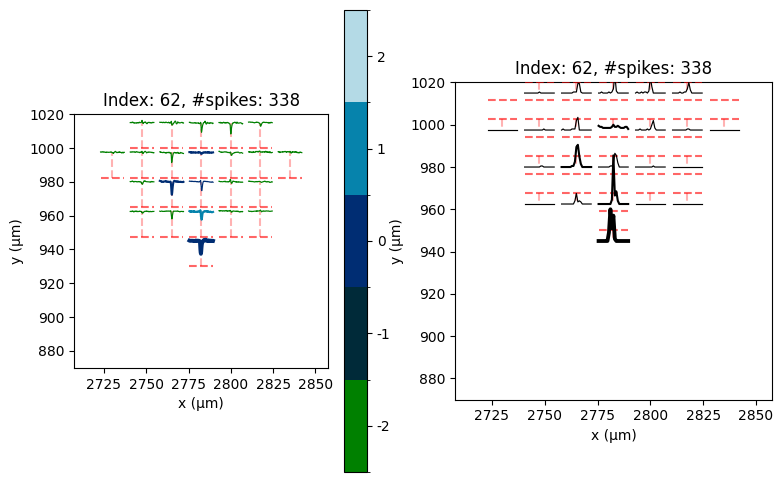

Extracting detection probabilities: 100%|██████████| 49/49 [00:00<00:00, 754.28it/s]


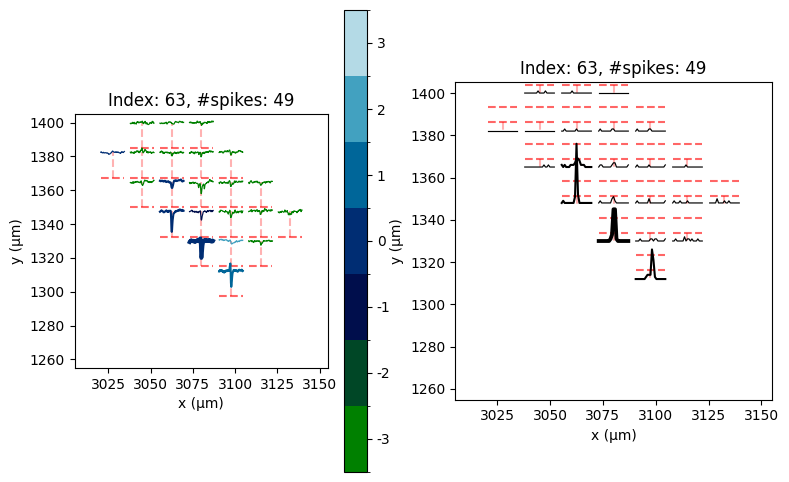

Extracting detection probabilities: 100%|██████████| 300/300 [00:00<00:00, 1690.40it/s]


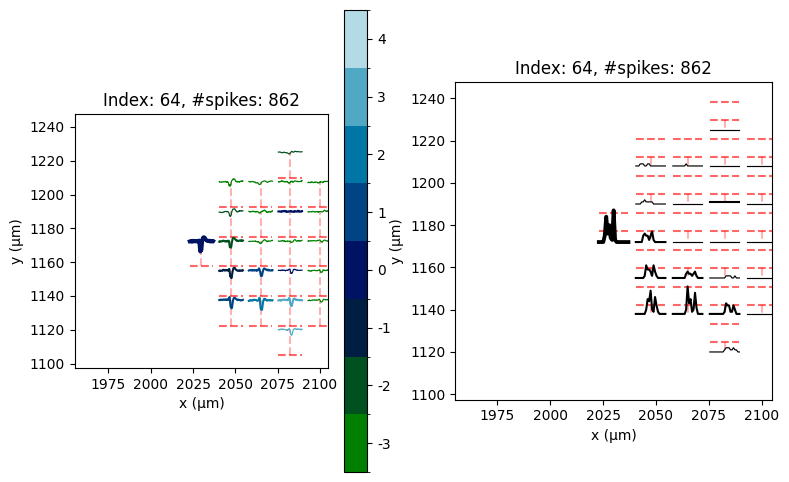

Extracting detection probabilities: 100%|██████████| 49/49 [00:00<00:00, 734.79it/s]


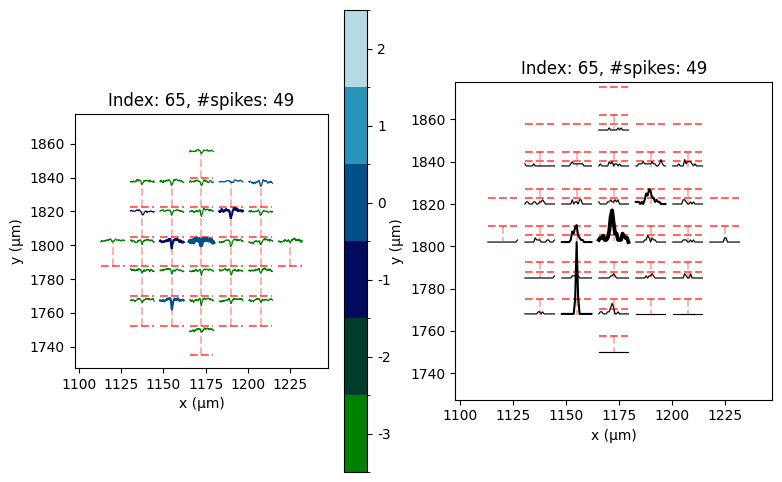

Extracting detection probabilities: 100%|██████████| 300/300 [00:00<00:00, 1682.79it/s]


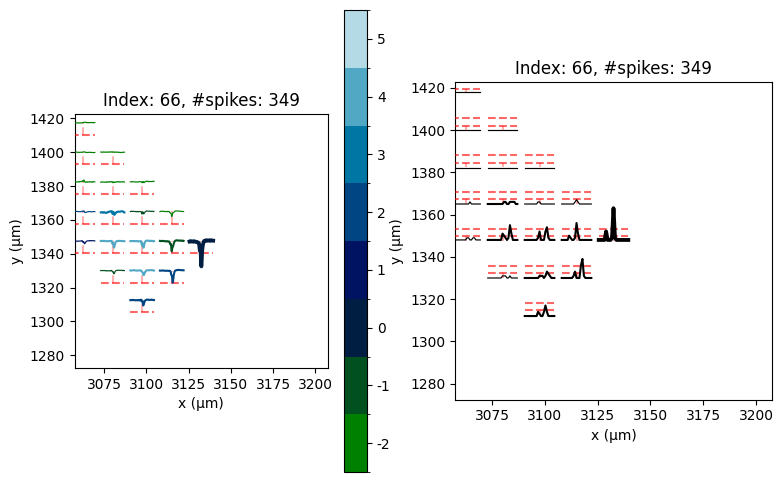

Extracting detection probabilities: 100%|██████████| 109/109 [00:00<00:00, 843.17it/s]


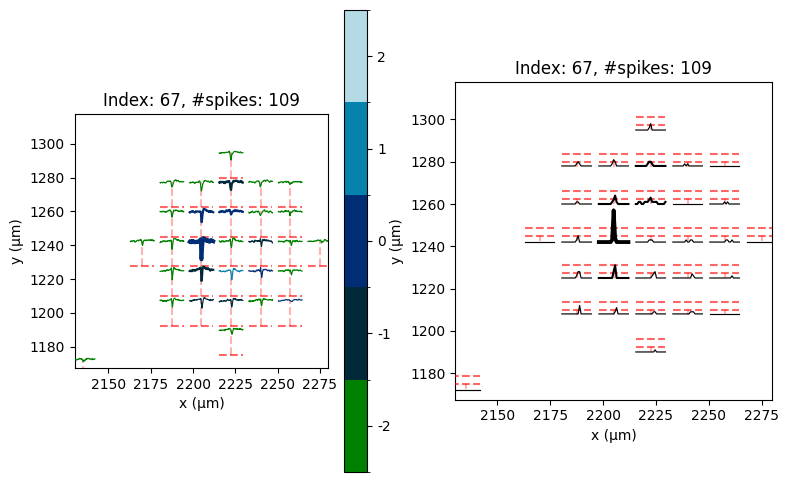

Extracting detection probabilities: 100%|██████████| 300/300 [00:00<00:00, 1670.28it/s]


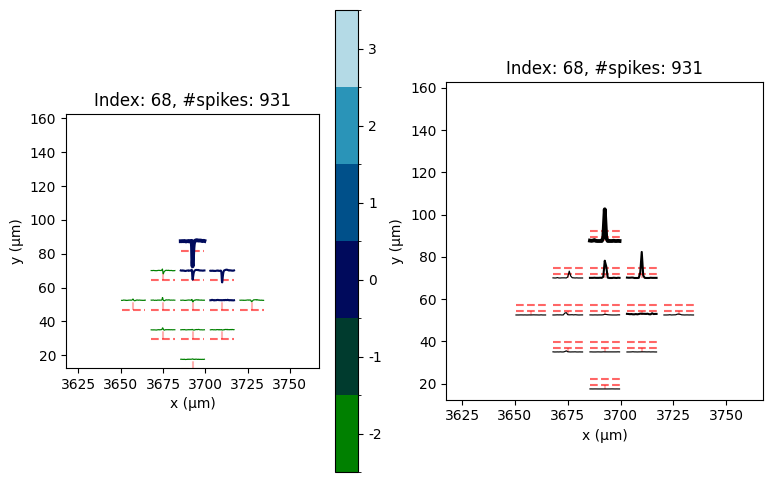

Extracting detection probabilities: 100%|██████████| 300/300 [00:00<00:00, 1325.67it/s]


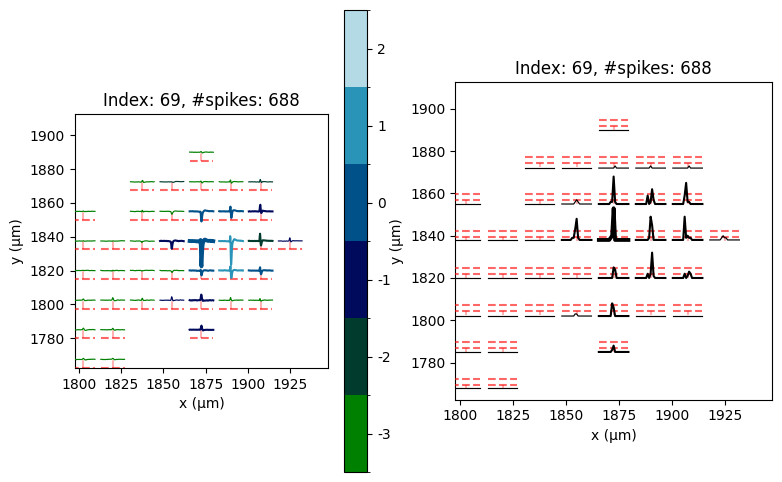

Extracting detection probabilities: 100%|██████████| 35/35 [00:00<00:00, 1304.43it/s]


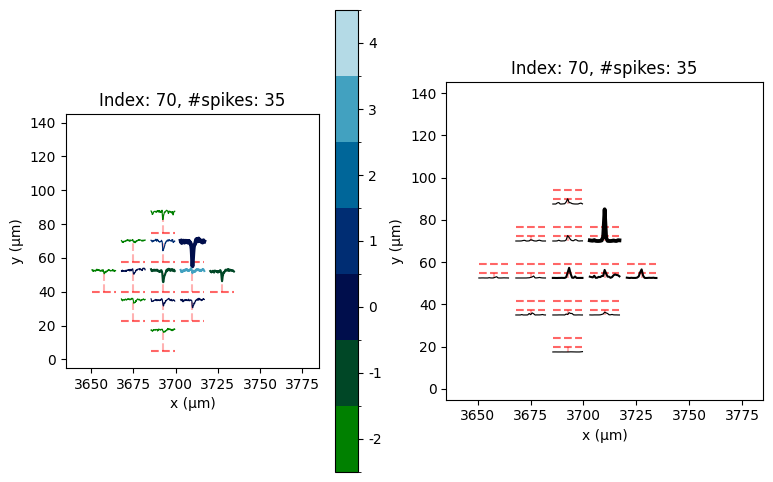

Extracting detection probabilities: 100%|██████████| 131/131 [00:00<00:00, 1808.27it/s]


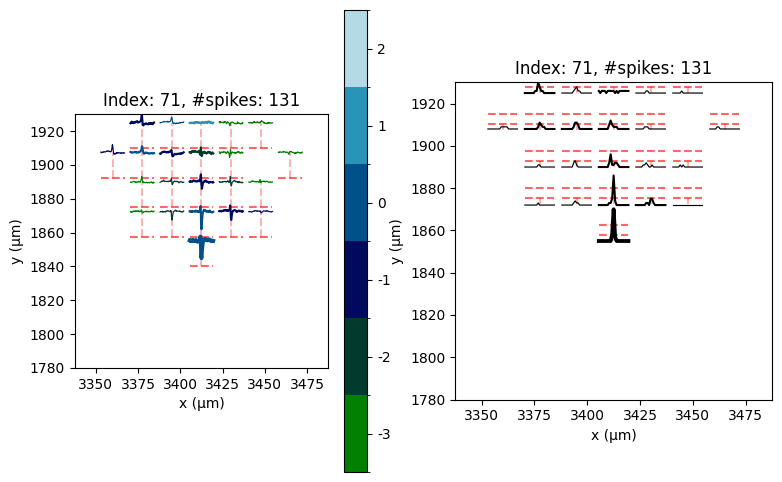

Extracting detection probabilities: 100%|██████████| 267/267 [00:00<00:00, 1776.76it/s]


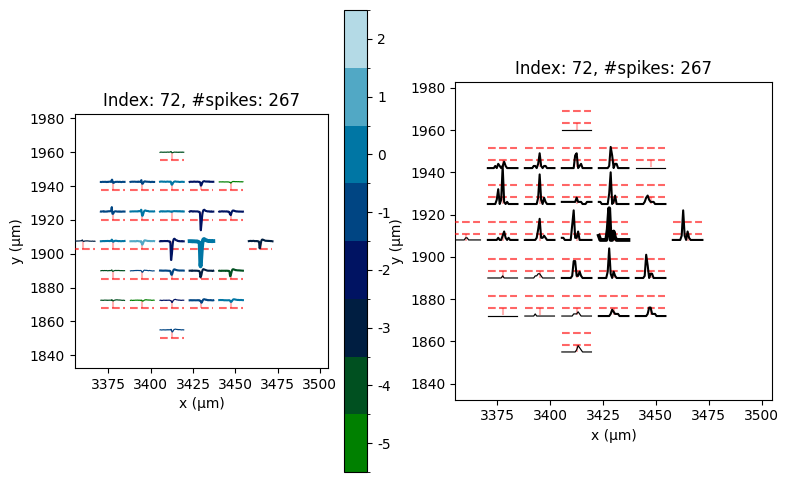

Extracting detection probabilities: 100%|██████████| 300/300 [00:00<00:00, 1771.09it/s]


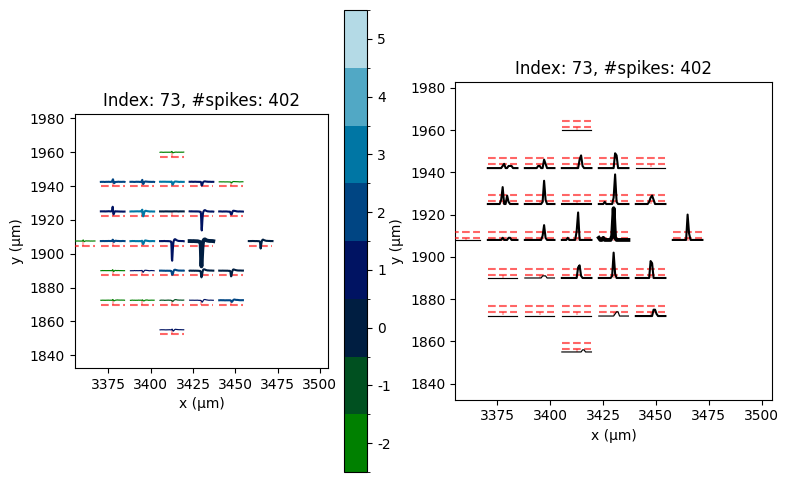

Extracting detection probabilities: 100%|██████████| 300/300 [00:00<00:00, 1304.37it/s]


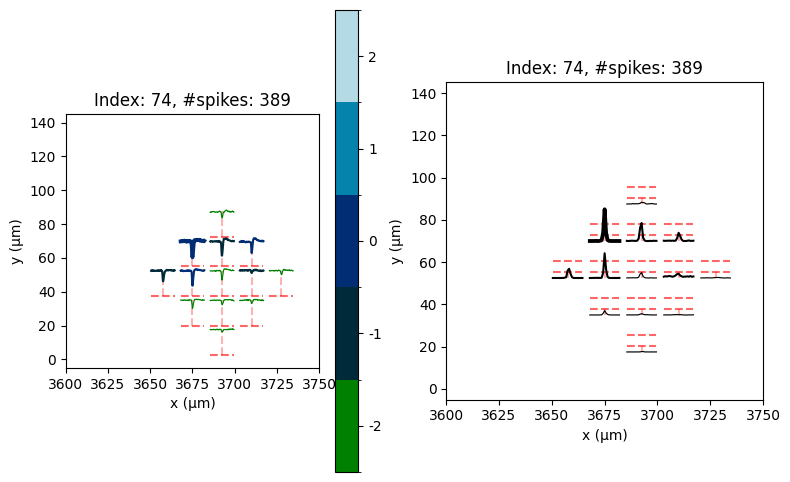

Extracting detection probabilities: 100%|██████████| 54/54 [00:00<00:00, 1717.49it/s]


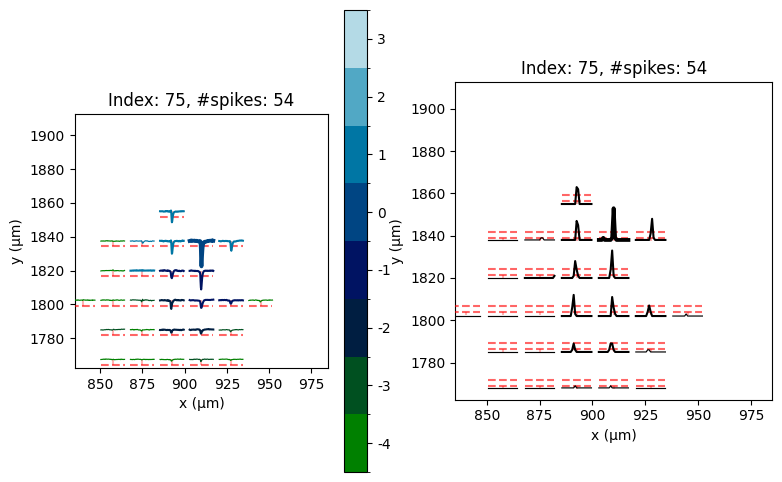

Extracting detection probabilities: 100%|██████████| 20/20 [00:00<00:00, 1008.43it/s]


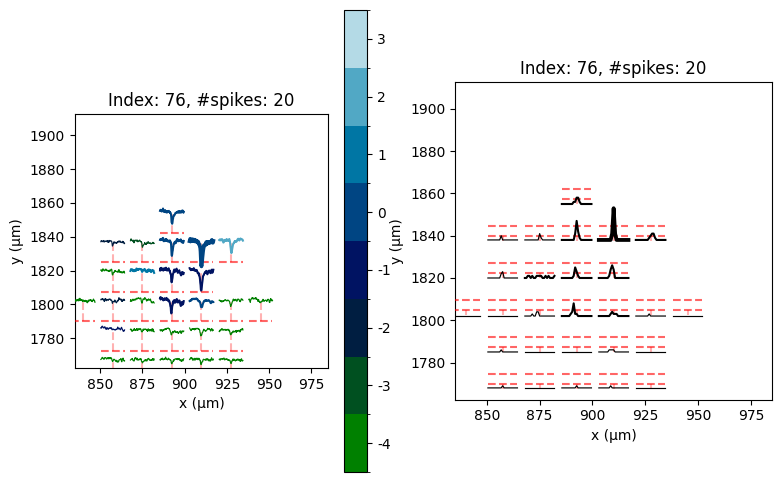

Extracting detection probabilities: 100%|██████████| 300/300 [00:00<00:00, 1291.71it/s]


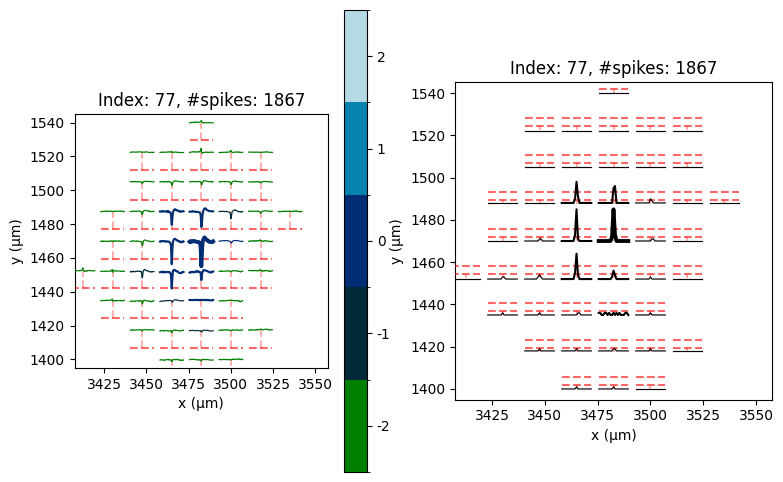

Extracting detection probabilities: 100%|██████████| 300/300 [00:00<00:00, 1009.18it/s]


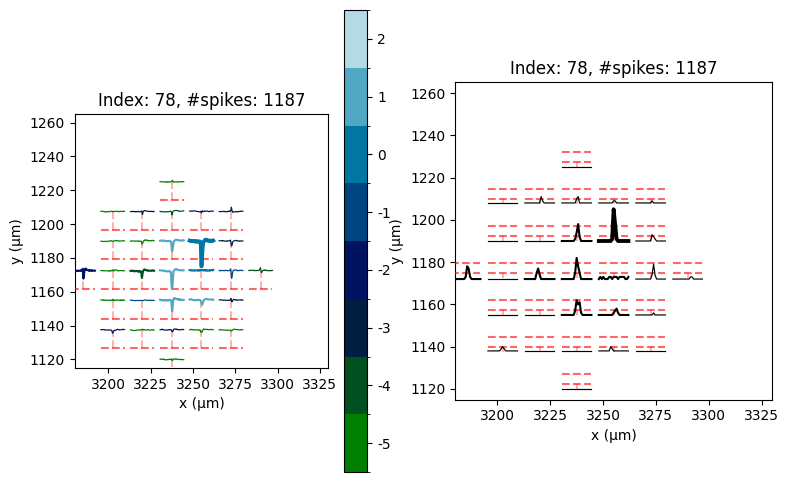

Extracting detection probabilities: 100%|██████████| 117/117 [00:00<00:00, 1798.99it/s]


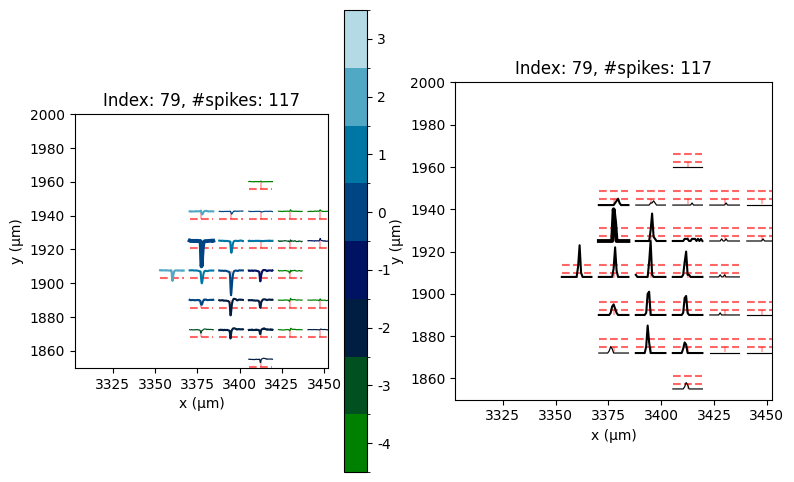

In [8]:
for unit in all_units[60:80]:
    F.plot_elec_probs(unit)
    plt.show()

In [ ]:
for unit in F.get_nearby_clusters(all_units, 2600, 600, 200):
    F.plot_elec_probs(unit)
    plt.show()